In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import normalize, minmax_scale

## Preparing ADL and FALL Datasets

### Reading in Datasets

In [2]:
# coming out with the directories for adl and fall files for each person
adl_dir = []
fall_dir = []
dataset_path = 'C:\\Users\\yiting.wong\\Documents\\NUS\\MedTech\\tFall\\publicFallDetector201307\\data201307'

for i in range(10):
    i_adl = '\\'.join([dataset_path, 'person'+str(i), 'adlProcessedVector', str(i)+'adlPV.dat'])
    i_fall = '\\'.join([dataset_path, 'person'+str(i), 'fallProcessedVector', str(i)+'fallPV.dat'])
    adl_dir.append(i_adl)
    fall_dir.append(i_fall)

In [3]:
# ADL: adl_x_data, adl_y_data, adl_z_data
# FALL: fall_x_data, fall_y_data, fall_z_data

# preparing x, y and z dataset for ADL

df0 = pd.read_csv(adl_dir[0], sep=" ", header=None)
df0_x = df0.loc[::3].values.copy()
df0_y = df0.loc[1::3].values.copy()
df0_z = df0.loc[2::3].values.copy()

adl_x_data = df0_x
adl_y_data = df0_y
adl_z_data = df0_z

for adlf in adl_dir:
    print(adlf)
    df = pd.read_csv(adlf, sep=" ", header=None)
    new_x = df.loc[::3].values.copy()
    new_y = df.loc[1::3].values.copy()
    new_z = df.loc[2::3].values.copy()
    adl_x_data = np.concatenate([adl_x_data, new_x])
    adl_y_data = np.concatenate([adl_y_data, new_y])
    adl_z_data = np.concatenate([adl_z_data, new_z])

print()
    
# preparing x, y, and z dataset for FALL

df1 = pd.read_csv(fall_dir[0], sep=" ", header=None)
df1_x = df1.loc[::3].values.copy()
df1_y = df1.loc[1::3].values.copy()
df1_z = df1.loc[2::3].values.copy()

fall_x_data = df1_x
fall_y_data = df1_y
fall_z_data = df1_z

for fallf in fall_dir:
    print(fallf)
    df = pd.read_csv(fallf, sep=" ", header=None)
    new_x = df.loc[::3].values.copy()
    new_y = df.loc[1::3].values.copy()
    new_z = df.loc[2::3].values.copy()
    fall_x_data = np.concatenate([fall_x_data, new_x])
    fall_y_data = np.concatenate([fall_y_data, new_y])
    fall_z_data = np.concatenate([fall_z_data, new_z])

C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person0\adlProcessedVector\0adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person1\adlProcessedVector\1adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person2\adlProcessedVector\2adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person3\adlProcessedVector\3adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person4\adlProcessedVector\4adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person5\adlProcessedVector\5adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person6\adlProcessedVector\6adlPV.dat
C:\Users\yiting.wong\Documents\NUS\MedTech\tFall\publicFallDetector201307\data201307\person7\adlProcessedVector\7adlPV.dat
C:\Users\yiting.

### Combining ADL and FALL Datasets

In [4]:
# ADL: adl_x_data, adl_y_data, adl_z_data
# FALL: fall_x_data, fall_y_data, fall_z_data

# creating labels for datasets

adl_x_labels = np.zeros((adl_x_data.shape[0], 1))
adl_y_labels = np.zeros((adl_y_data.shape[0], 1))
adl_z_labels = np.zeros((adl_z_data.shape[0], 1))

fall_x_labels = np.ones((fall_x_data.shape[0], 1))
fall_y_labels = np.ones((fall_y_data.shape[0], 1))
fall_z_labels = np.ones((fall_z_data.shape[0], 1))

In [5]:
# downsampling adl datas (datasets and labels)
np.random.seed(0)
x_indices = np.random.randint(0, len(adl_x_labels), len(fall_x_labels))
y_indices = np.random.randint(0, len(adl_y_labels), len(fall_y_labels))
z_indices = np.random.randint(0, len(adl_z_labels), len(fall_z_labels))

adl_x_data = adl_x_data[x_indices]
adl_y_data = adl_y_data[y_indices]
adl_z_data = adl_z_data[z_indices]

adl_x_labels = adl_x_labels[x_indices]
adl_y_labels = adl_y_labels[y_indices]
adl_z_labels = adl_z_labels[z_indices]

In [6]:
# combine x from adl and fall
x_data = np.concatenate([adl_x_data, fall_x_data])
y_data = np.concatenate([adl_y_data, fall_y_data])
z_data = np.concatenate([adl_z_data, fall_z_data])

# combine the labels
x_labels = np.concatenate([adl_x_labels, fall_x_labels])
y_labels = np.concatenate([adl_y_labels, fall_y_labels])
z_labels = np.concatenate([adl_z_labels, fall_z_labels])

### Normalising the datasets

In [7]:
x_data_normalized = minmax_scale(x_data, feature_range=(0,1))
y_data_normalized = minmax_scale(y_data, feature_range=(0,1))
z_data_normalized = minmax_scale(z_data, feature_range=(0,1))

### Train-Test Split

In [8]:
x_train_data, x_test_data, x_train_labels, x_test_labels = train_test_split(x_data_normalized, x_labels, test_size=0.33, random_state=42)
y_train_data, y_test_data, y_train_labels, y_test_labels = train_test_split(y_data_normalized, y_labels, test_size=0.33, random_state=42)
z_train_data, z_test_data, z_train_labels, z_test_labels = train_test_split(z_data_normalized, z_labels, test_size=0.33, random_state=42)

In [9]:
len(adl_x_labels)

554

## Create NN Model

In [10]:
xmodel = tf.keras.Sequential()
xmodel.add(layers.Dense(100, input_shape = (301,), activation = 'relu'))
xmodel.add(layers.Dense(150, activation = 'relu'))
xmodel.add(layers.Dense(1, activation = 'sigmoid'))
xmodel.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_acc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])
xmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               30200     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor = 'val_precision', patience = 5)
xhistory = xmodel.fit(x_train_data, x_train_labels, epochs = 1000,
                    shuffle = True,
                    validation_data = (x_test_data, x_test_labels),
                    callbacks = [early_stopping])

Epoch 1/1000
24/24 [==============================] - 1s 16ms/step - loss: 0.6978 - binary_acc: 0.5175 - precision: 0.5301 - recall: 0.5105 - val_loss: 0.7141 - val_binary_acc: 0.4754 - val_precision: 0.4754 - val_recall: 1.0000
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6786 - binary_acc: 0.5539 - precision: 0.5596 - recall: 0.6053 - val_loss: 0.6632 - val_binary_acc: 0.4781 - val_precision: 0.4767 - val_recall: 1.0000
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6066 - binary_acc: 0.7493 - precision: 0.8089 - recall: 0.6684 - val_loss: 0.5745 - val_binary_acc: 0.7459 - val_precision: 0.9175 - val_recall: 0.5115
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5097 - binary_acc: 0.8113 - precision: 0.9225 - recall: 0.6895 - val_loss: 0.5041 - val_binary_acc: 0.8005 - val_precision: 0.8976 - val_recall: 0.6552
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4351 - bina

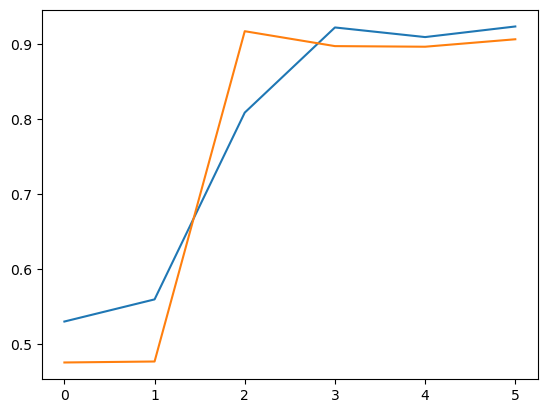

In [12]:
plt.plot(xhistory.history['precision'])
plt.plot(xhistory.history['val_precision'])
plt.show()

In [13]:
x_predicted = xmodel.predict(x_test_data)
xmodel.evaluate(x_test_data, x_test_labels)

12/12 [==============================] - 0s 1ms/step - loss: 0.4751 - binary_acc: 0.7869 - precision: 0.9068 - recall: 0.6149


[0.4750961661338806,
 0.7868852615356445,
 0.9067796468734741,
 0.6149425506591797]

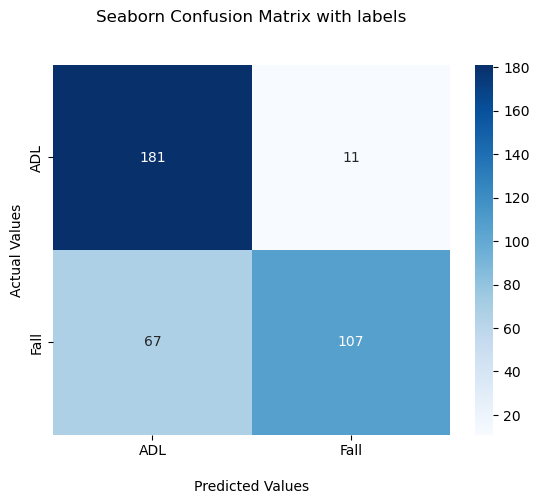

In [14]:
cf_matrix = confusion_matrix(x_test_labels, x_predicted>0.5)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
ymodel = tf.keras.Sequential()
ymodel.add(layers.Dense(100, input_shape = (301,), activation = 'relu'))
ymodel.add(layers.Dense(150, activation = 'relu'))
ymodel.add(layers.Dense(1, activation = 'sigmoid'))
ymodel.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_acc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])
ymodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               30200     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stopping = EarlyStopping(monitor = 'val_precision', patience = 5)
yhistory = ymodel.fit(y_train_data, y_train_labels, epochs = 1000,
                    shuffle = True,
                    validation_data = (y_test_data, y_test_labels),
                    callbacks = [early_stopping])

Epoch 1/1000
24/24 [==============================] - 1s 11ms/step - loss: 0.6815 - binary_acc: 0.5418 - precision: 0.5498 - recall: 0.5816 - val_loss: 0.6455 - val_binary_acc: 0.4945 - val_precision: 0.4846 - val_recall: 0.9943
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.5844 - binary_acc: 0.7938 - precision: 0.7551 - recall: 0.8842 - val_loss: 0.5269 - val_binary_acc: 0.8415 - val_precision: 0.9203 - val_recall: 0.7299
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4262 - binary_acc: 0.8801 - precision: 0.9396 - recall: 0.8184 - val_loss: 0.4308 - val_binary_acc: 0.8907 - val_precision: 0.8851 - val_recall: 0.8851
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3557 - binary_acc: 0.8827 - precision: 0.9271 - recall: 0.8368 - val_loss: 0.3894 - val_binary_acc: 0.9071 - val_precision: 0.9070 - val_recall: 0.8966
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3057 - bina

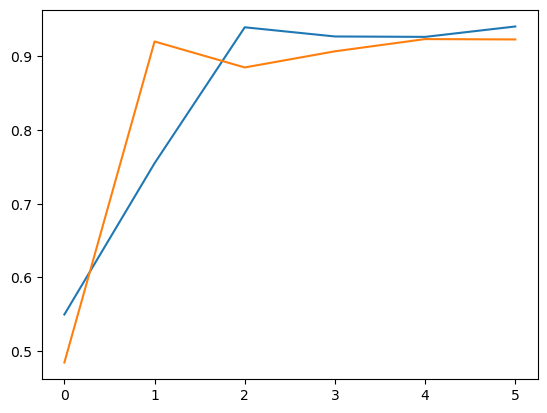

In [17]:
plt.plot(yhistory.history['precision'])
plt.plot(yhistory.history['val_precision'])
plt.show()

In [18]:
y_predicted = ymodel.predict(y_test_data)
ymodel.evaluate(y_test_data, y_test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 0.3162 - binary_acc: 0.8852 - precision: 0.9231 - recall: 0.8276


[0.31617528200149536,
 0.8852459192276001,
 0.9230769276618958,
 0.8275862336158752]

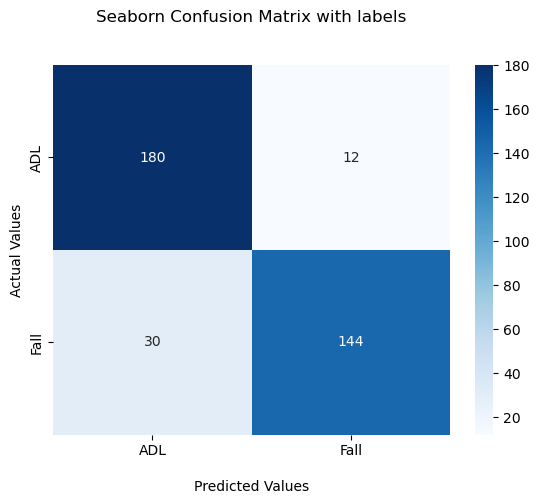

In [19]:
cf_matrix = confusion_matrix(y_test_labels, y_predicted>0.5)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
zmodel = tf.keras.Sequential()
zmodel.add(layers.Dense(100, input_shape = (301,), activation = 'relu'))
zmodel.add(layers.Dense(150, activation = 'relu'))
zmodel.add(layers.Dense(1, activation = 'sigmoid'))
zmodel.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_acc'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])
zmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               30200     
                                                                 
 dense_7 (Dense)             (None, 150)               15150     
                                                                 
 dense_8 (Dense)             (None, 1)                 151       
                                                                 
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
_________________________________________________________________


In [21]:
early_stopping = EarlyStopping(monitor = 'val_precision', patience = 5)
zhistory = zmodel.fit(z_train_data, z_train_labels, epochs = 1000,
                    shuffle = True,
                    validation_data = (z_test_data, z_test_labels),
                    callbacks = [early_stopping])

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 0.6786 - binary_acc: 0.5647 - precision: 0.5626 - recall: 0.6737 - val_loss: 0.6452 - val_binary_acc: 0.5874 - val_precision: 0.9600 - val_recall: 0.1379
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.5991 - binary_acc: 0.7480 - precision: 0.7813 - recall: 0.7053 - val_loss: 0.5228 - val_binary_acc: 0.8361 - val_precision: 0.9318 - val_recall: 0.7069
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4811 - binary_acc: 0.8450 - precision: 0.9077 - recall: 0.7763 - val_loss: 0.4105 - val_binary_acc: 0.8497 - val_precision: 0.9220 - val_recall: 0.7471
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.4345 - binary_acc: 0.8221 - precision: 0.8780 - recall: 0.7579 - val_loss: 0.3961 - val_binary_acc: 0.8525 - val_precision: 0.9286 - val_recall: 0.7471
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.3960 - bina

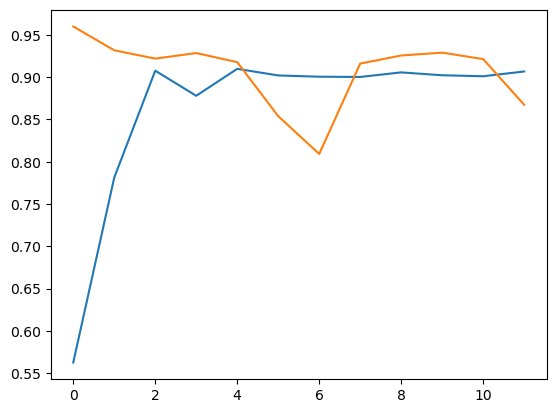

In [22]:
plt.plot(zhistory.history['precision'])
plt.plot(zhistory.history['val_precision'])
plt.show()

In [23]:
z_predicted = zmodel.predict(z_test_data)
zmodel.evaluate(z_test_data, z_test_labels)

12/12 [==============================] - 0s 2ms/step - loss: 0.3596 - binary_acc: 0.8880 - precision: 0.8674 - recall: 0.9023


[0.3596143424510956,
 0.8879781365394592,
 0.8674033284187317,
 0.9022988677024841]

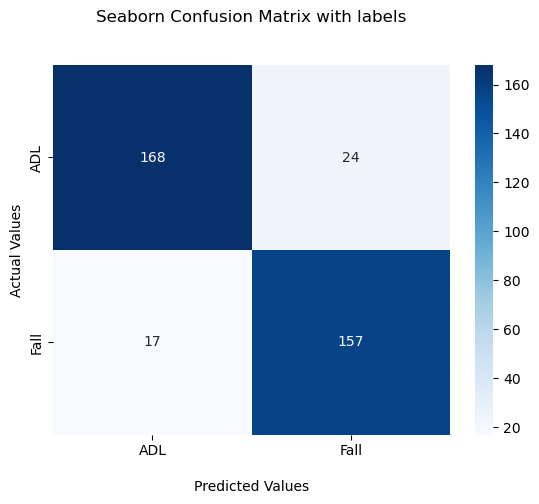

In [24]:
cf_matrix = confusion_matrix(z_test_labels, z_predicted>0.5)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
# majority voting

x_predicted = np.round(x_predicted)
y_predicted = np.round(y_predicted)
z_predicted = np.round(z_predicted)
predicted = (x_predicted + y_predicted + z_predicted) >= 2

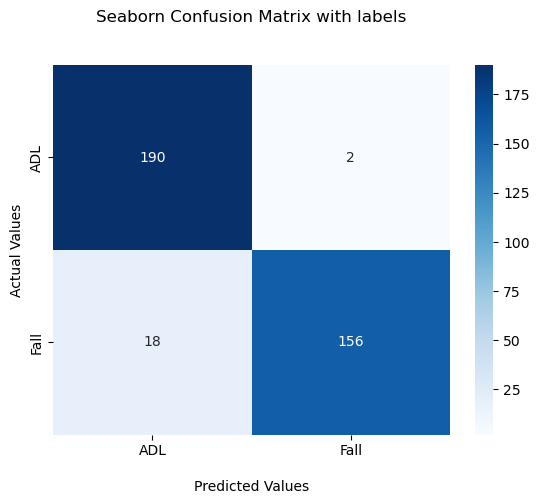

In [26]:
cf_matrix = confusion_matrix(z_test_labels, predicted)

ax = sn.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['ADL','Fall'])
ax.yaxis.set_ticklabels(['ADL','Fall'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
def calculate_metric(cf_matrix):
    tp, fp = cf_matrix[0]
    fn, tn = cf_matrix[1]
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*((precision*recall)/(precision+recall))
    
    print(f'Accuracy: {round(accuracy, 3)}')
    print(f'Precision: {round(precision, 3)}')
    print(f'Recall: {round(recall, 3)}')
    print(f'F1 Score: {round(f1_score, 3)}')

In [28]:
calculate_metric(cf_matrix)

Accuracy: 0.945
Precision: 0.99
Recall: 0.913
F1 Score: 0.95


In [32]:
xmodel.save('Saved Models/ann_model_x_axis_tFall')
ymodel.save('Saved Models/ann_model_y_axis_tFall')
zmodel.save('Saved Models/ann_model_z_axis_tFall')

INFO:tensorflow:Assets written to: Saved Models/ann_model_x_axis_tFall\assets


INFO:tensorflow:Assets written to: Saved Models/ann_model_x_axis_tFall\assets


INFO:tensorflow:Assets written to: Saved Models/ann_model_y_axis_tFall\assets


INFO:tensorflow:Assets written to: Saved Models/ann_model_y_axis_tFall\assets


INFO:tensorflow:Assets written to: Saved Models/ann_model_z_axis_tFall\assets


INFO:tensorflow:Assets written to: Saved Models/ann_model_z_axis_tFall\assets
